In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [8]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.shape

(10000, 14)

In [11]:
x=df.iloc[:,3:13]
y=df.iloc[:,13]
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [14]:
#categorical encoding
#it crtes colums for each category of the coloumns,eg:
geo=pd.get_dummies(x['Geography'],drop_first=True,dtype=int)#
gen=pd.get_dummies(x['Gender'],drop_first=True,dtype=int)
gen

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [28]:
x=pd.concat([x,geo,gen],axis=1)
x=x.drop(['Geography','Gender'],axis=1)

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [31]:
import keras

In [34]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
cls=Sequential()

In [38]:
cls.add(Dense(6,kernel_initializer='he_uniform',activation='relu',input_dim=11))
#cls.add(Dense(6,kernel_initializer='he_uniform',activation='relu',input_dim=11))

In [40]:
cls.add(Dense(6,kernel_initializer='he_uniform',activation='relu'))
cls.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [44]:
cls.compile(optimizer='Adamax',loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
model_history=cls.fit(x_train,y_train,validation_split=0.33,batch_size=10,epochs=20)

Epoch 1/20
536/536 [==============================] - 1s 2ms/step - loss: 1.9598 - accuracy: 7.4641e-04 - val_loss: 1.8642 - val_accuracy: 0.0027
Epoch 2/20
536/536 [==============================] - 1s 2ms/step - loss: 1.9434 - accuracy: 0.0050 - val_loss: 1.8469 - val_accuracy: 0.0102
Epoch 3/20
536/536 [==============================] - 1s 2ms/step - loss: 1.9257 - accuracy: 0.0136 - val_loss: 1.8283 - val_accuracy: 0.0216
Epoch 4/20
536/536 [==============================] - 1s 2ms/step - loss: 1.9121 - accuracy: 0.0319 - val_loss: 1.8118 - val_accuracy: 0.0435
Epoch 5/20
536/536 [==============================] - 1s 2ms/step - loss: 1.8975 - accuracy: 0.0629 - val_loss: 1.8007 - val_accuracy: 0.0992
Epoch 6/20
536/536 [==============================] - 1s 2ms/step - loss: 1.8898 - accuracy: 0.1463 - val_loss: 1.7951 - val_accuracy: 0.1738
Epoch 7/20
536/536 [==============================] - 1s 2ms/step - loss: 1.8855 - accuracy: 0.2021 - val_loss: 1.7934 - val_accuracy: 0.2207
Ep

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


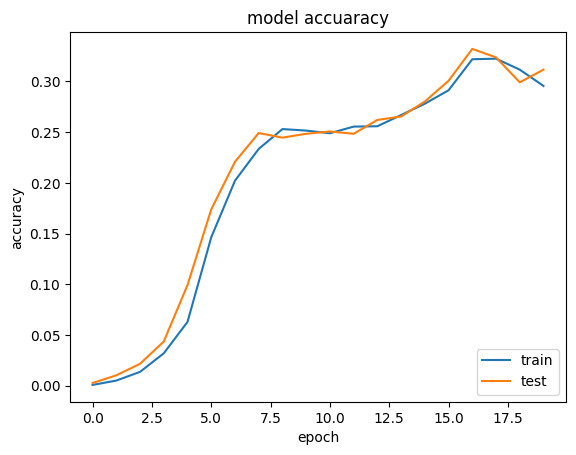

In [54]:
print(model_history.history.keys())
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuaracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='lower right')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


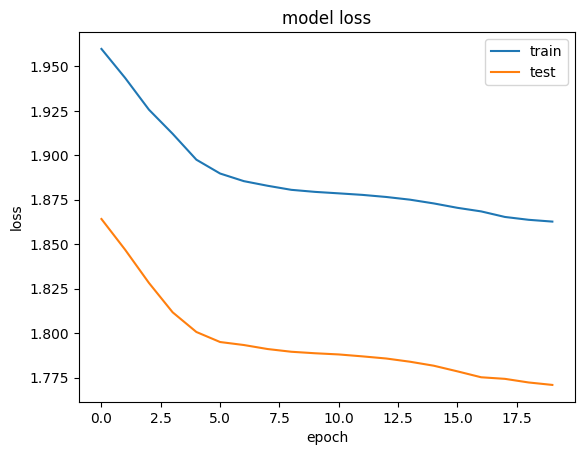

In [55]:
print(model_history.history.keys())
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [56]:
y_pred=cls.predict(x_test)
y_pred=(y_pred>0.5)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       ...,
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])